In [15]:
#Either we can run NN or we can run other algorithms
#import the package
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#Reading csv file
df1=pd.read_csv(r"STUDENT_DATA13.csv")
#df1.head()
df1.shape


(13122, 20)

In [16]:
dataset_col_idx = [df1.columns.get_loc(c) for c in df1.columns.values if c in df1]
dataset_col_name = list(df1.columns.values)
print (dataset_col_idx)
print (dataset_col_name)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
['Main Serial No.', 'Sr. No.', 'College Name', 'College Code', 'Merit No', 'Merit Marks', 'Candidate Name', 'Gender', 'Candidate Type', 'Category', 'Home University', 'PH Type', 'Defence Type', 'HSC Eligibility', 'Seat Type', 'Fees Paid', 'CAP Round', 'Admitted/Uploaded Late', 'BRANCH', 'NATIONALITY']


In [17]:
df= df1.copy(deep=True) # make a copy and keep original dataframe
df_target=df['College Name']
df= df.drop('College Name', axis=1)
df = pd.concat([df,df_target],axis=1)


In [18]:
# columns to be dropped which are not relevant to classification / prediction problem
df.drop(['Main Serial No.','Sr. No.','Candidate Name', 'Seat Type', 'Fees Paid', 'Admitted/Uploaded Late'], axis=1, inplace=True)
df.columns

Index(['College Code', 'Merit No', 'Merit Marks', 'Gender', 'Candidate Type',
       'Category', 'Home University', 'PH Type', 'Defence Type',
       'HSC Eligibility', 'CAP Round', 'BRANCH', 'NATIONALITY',
       'College Name'],
      dtype='object')

# Data Preprocessing

In [19]:
def data_summary(df):
    print ('\nColumn - Data Types: ', df.info())
    print ('\nDescriptive Statistics including NaN: ', df.describe())
    print('\nCount of NaN in each feature: ', df.isnull().sum()) 
    
#    print('\nTotal Students: ', df['Candidate Name'].count())
    print('\nTotal No of Colleges(College Code):\n ', df['College Code'].value_counts())
    print('\nTotal No of Colleges(College Name):\n ', df['College Name'].value_counts())
    
#    print('\nTotal Branches: ', df['BRANCH'].value_counts())
    print('\nTotal  Students: ', df['Merit Marks'].count())
    print('\nStudent count by College: ')
#    print(df['BRANCH'].value_counts())
    print(df['College Name'].value_counts(normalize=True))

In [20]:
data_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13122 entries, 0 to 13121
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   College Code     13119 non-null  float64
 1   Merit No         13119 non-null  float64
 2   Merit Marks      13119 non-null  float64
 3   Gender           13119 non-null  object 
 4   Candidate Type   13119 non-null  object 
 5   Category         12706 non-null  object 
 6   Home University  13116 non-null  object 
 7   PH Type          25 non-null     object 
 8   Defence Type     287 non-null    object 
 9   HSC Eligibility  13118 non-null  float64
 10  CAP Round        13118 non-null  object 
 11  BRANCH           13119 non-null  object 
 12  NATIONALITY      13119 non-null  object 
 13  College Name     13119 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.4+ MB

Column - Data Types:  None

Descriptive Statistics including NaN:         College Code       Merit No

In [21]:
df.isnull().sum()

College Code           3
Merit No               3
Merit Marks            3
Gender                 3
Candidate Type         3
Category             416
Home University        6
PH Type            13097
Defence Type       12835
HSC Eligibility        4
CAP Round              4
BRANCH                 3
NATIONALITY            3
College Name           3
dtype: int64

In [22]:
df['HSC Eligibility'] = df['HSC Eligibility'].astype(float)
df['Merit Marks'] = df['Merit Marks'].astype(float)
def preprocess_data(df):
    #df['Diploma Percentage'] = np.where(pd.isnull(df['Diploma Percentage']), df['HSC Percentage'], df['Diploma Percentage'])
    df2=pd.read_csv(r"STUDENT_DATA13.csv",usecols=["Merit Marks"])
    for Marks in range(len(df2)):
        if(df2.iloc[Marks,0])>1000000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100000
        if(df2.iloc[Marks,0])>100000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10000
        elif(df2.iloc[Marks,0])>10000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/1000
        elif(df2.iloc[Marks,0])>1000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100
        elif(df2.iloc[Marks,0])>100:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10
    df["Merit Marks"]=df2["Merit Marks"]
    print('\nMax Merit Marks: ',df['Merit Marks'].max())
    df2=pd.read_csv(r"STUDENT_DATA13.csv",usecols=["HSC Eligibility"])
    for Marks in range(len(df2)):
        if(df2.iloc[Marks,0])>100000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10000
        elif(df2.iloc[Marks,0])>10000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/1000
        elif(df2.iloc[Marks,0])>1000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100
        elif(df2.iloc[Marks,0])>100:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10
    df["HSC Eligibility"]=df2["HSC Eligibility"]
    print('\nMax HSC Eligibility: ',df["HSC Eligibility"].max())
    df['College Name'].replace('PVG CET, PUNE', 'PVG CET', inplace=True)
    df['College Name'].replace('DY PATIL AKURDI', 'DY PATIL AK', inplace=True)
    df['College Name'].replace('PICT, PUNE', 'PICT', inplace=True)
    df['College Name'].replace('MMMIT, LOHGAON, PUNE', 'MMMIT, LOH', inplace=True)
    df['College Name'].replace('KJCOEMR, PISOLI', 'KJCOEMR', inplace=True)
    df['College Name'].replace('KJ TRINITY COER', 'KJ TRINITY', inplace=True)
    df['College Name'].replace('SINHGAD KONDHWA (BK)', 'SINHGAD KONDHWA', inplace=True)
    df['College Name'].replace('INDIRA COEM, PUNE', 'INDIRA COEM', inplace=True)
    df['College Name'].replace('SINHGAD SKN, VADGAON', 'SINHGAD SKN', inplace=True)
    df['College Name'].replace('PES MODERN COE, PUNE', 'PES MODERN', inplace=True)
    df['College Name'].replace('TSSM PVPIT, BAVDHAN', 'PVPIT, BAVDHAN', inplace=True)
    df['College Name'].replace('SINHGAD ACADEMY, KONDHWA', 'SINHGAD ACAD, KONDHWA', inplace=True)
    df['College Name'].replace('PIMPRI CHINCHWAD COLLEGE OF ENGG AND RESEARCH', 'PCCOE, Ravet', inplace=True)
    df['College Name'].replace('PIMPRI\xa0CHINCHWAD\xa0COLLEGE OF\xa0ENGG\xa0AND\xa0RESEARCH', 'PCCOE, Ravet', inplace=True)
    df['College Name'].replace('PIMPRI燙HINCHWAD燙OLLEGE OF燛NGG燗ND燫ESEARCH', 'PCCOE, Ravet', inplace=True)
    df['College Name'].replace('SC0E, VADGAON', 'SCOE, VADGAON', inplace=True)
    df['College Name'].replace('PIMPRI CHINCHWAD COLLEGE OF ENGINEERING', 'PCCOE', inplace=True)
    df['College Name'].replace('MAEERS M.I.T COLLEGE OF ENGINEERING', 'M.I.T COE', inplace=True)
    df['College Name'].replace('DY PATIL IET,PIMPRI', 'DY PATIL,PIMPRI', inplace=True)
    df['College Name'].replace('MMCOE, KARVENAGAR, PUNE', 'MMCOE,PUNE', inplace=True)
    
    df['Defence Type'].replace('DEF-3', 'DEF3', inplace=True)
    df['Defence Type'].replace('DEF 2', 'DEF2', inplace=True)
    df['Defence Type'].replace('DEF 3', 'DEF3', inplace=True)
    df['Defence Type'].replace('DEF 1', 'DEF1', inplace=True)
    df['Defence Type'].replace('DEF-1', 'DEF1', inplace=True)
    df['Defence Type'].replace('DEF-3', 'DEF3', inplace=True)
    
    df['Category'].replace('OPEN ', 'OPEN', inplace=True)
    
    df['Home University'].replace('S.R.T.M.U', 'S.R.T.M.U.', inplace=True)
    df['Home University'].replace('SRTMU', 'S.R.T.M.U.', inplace=True)
    df['Home University'].replace('B.A.M.U', 'B.A.M.U.', inplace=True)
    df['Home University'].replace('BAMU', 'B.A.M.U.', inplace=True)
    df['Home University'].replace('GONDWANE', 'GONDWANA', inplace=True)
    df['Home University'].replace('PUME', 'PUNE', inplace=True)
    df['Home University'].replace('M', 'MUMBAI', inplace=True) 
    df['Home University'].replace('OHU ', 'OHU', inplace=True)  
    df['Home University'].replace('0', 'OHU', inplace=True)
    df['Home University'].replace(' SHIVAJI ', 'SHIVAJI', inplace=True)
    df['Home University'].replace('SH', 'SHIVAJI', inplace=True)
    df['Home University'].replace('AMRAVATI ', 'AMRAVATI', inplace=True)
    df['Home University'].replace('SO', 'SOLAPUR', inplace=True)
    df['Home University'].replace('A', 'SOLAPUR', inplace=True)
    df['Home University'].replace('NAGAPUR', 'NAGPUR', inplace=True)
    df['Home University'].replace('NORTH MAHATRASHTRA', 'NORTH MAHARASHTRA', inplace=True)
    
    df['Category'].replace('O', 'OPEN', inplace=True)
    df['Category'].replace('PO', 'OPEN', inplace=True)
    df['Category'].replace('OBC ', 'OBC', inplace=True)
    df['Category'].replace('SCS', 'SC', inplace=True)
    df['Category'].replace('ST ', 'ST', inplace=True)
    df['Category'].replace('O', 'OPEN', inplace=True)
    df['Category'].replace('NY-C', 'NT-C', inplace=True)
    df['Category'].replace('NY-D', 'NT-D', inplace=True)
    df['Category'].replace('NT', 'NT-D', inplace=True)
    df['Category'].replace('NT--B', 'NT-B', inplace=True)
    df['Category'].replace('NA ', 'NT-D', inplace=True)
    df['Category'].replace('NT-D ', 'NT-D', inplace=True)
    df['Category'].replace('OMS', 'OBC', inplace=True)
    
    df['BRANCH'].replace('ELECTRONIC AND TELECOMMUNICATION ENG.', 'ENTC', inplace=True)
    df['BRANCH'].replace('INFORMATION TECHNOLOGY', 'IT', inplace=True)
    df['BRANCH'].replace('ELECTRONIC AND TELECOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMMUNICATION ENG.', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELCOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('PRODUCTION ENGINEERING', 'PRODUCTION', inplace=True)
    df['BRANCH'].replace('COMPUTER ENGINEERING', 'COMPUTER', inplace=True)
    df['BRANCH'].replace('COMPUTER  ENGINEERING', 'COMPUTER', inplace=True)    
    df['BRANCH'].replace('CIVIL ENGINEERING', 'CIVIL', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('MECHANICAL  ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('MACHANICAL  ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('ELECTRIC ENGINEERING', 'ELECTRICAL', inplace=True)
    df['BRANCH'].replace('ELECTRICAL ENGINEERING', 'ELECTRICAL', inplace=True)
    df['BRANCH'].replace('ELECTRONIC', 'ELECTRONICS', inplace=True)
    df['BRANCH'].replace('AUTOMOBILE ENG.', 'AUTOMOBILE', inplace=True)
    df['BRANCH'].replace('POLYMER ENGINEERING', 'POLYMER', inplace=True)
    df['BRANCH'].replace('PETRO CHEMICAL ENGINNEERING', 'PETRO CHEMICAL', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('PETROLEUM ENGINEERING', 'PETROLEUM', inplace=True)
    df['BRANCH'].replace('AUTOMOBILE ENG.', 'AUTOMOBILE', inplace=True)
    df['BRANCH'].replace('POLYMER ENGINEERING', 'POLYMER', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING [SANDWICH]', 'MECHANICAL[SANDWICH]', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELTCOMMNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('INSTRUMENTATION  ENGINEERING', 'INSTRUMENTATION', inplace=True)
    df['BRANCH'].replace('INSTRUMENTAION ENGINEERING', 'INSTRUMENTATION', inplace=True)
                         
    df['Candidate Type'].replace('TYPE  A', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPE A ',  'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPE  B', 'TYPE B', inplace=True)
    df['Candidate Type'].replace('TYPE B ', 'TYPE B', inplace=True)
    df['Candidate Type'].replace('TYPE  C', 'TYPE C', inplace=True)
    df['Candidate Type'].replace('MAHARASHTRA TYPE E', 'TYPE E', inplace=True)
    df['Candidate Type'].replace('TYPEC', 'TYPE C', inplace=True)
    df['Candidate Type'].replace('J & K', 'J&K', inplace=True)
    df['Candidate Type'].replace('TYPE ', 'TYPE E', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP SCHEME', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('JKSSS', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('JKSSS', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J & K SPECIAL SCHOLARSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J & K SPECIAL SCHOLORSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('TYEP A', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPEA', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('GoI', 'PIO', inplace=True)
    df['Candidate Type'].replace('OMS ', 'OMS', inplace=True)

    df['CAP Round'].replace('ROUND 1', 'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND 2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND 3', 'ROUND-3', inplace=True)
    df['CAP Round'].replace('ROUND 4', 'ROUND-4', inplace=True)
    df['CAP Round'].replace('ROUND 5', 'ROUND-5', inplace=True)
    df['CAP Round'].replace('ROIND 1', 'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND 6', 'ROUND-6', inplace=True)
    df['CAP Round'].replace('ROUND 7',  'ROUND-7', inplace=True)
    df['CAP Round'].replace('ROUND 8', 'ROUND-8', inplace=True)
    df['CAP Round'].replace('ROUND 9', 'ROUND-9', inplace=True)
    df['CAP Round'].replace('ROUND 10', 'ROUND-10', inplace=True)
    df['CAP Round'].replace('ROIND 11', 'ROUND-11', inplace=True)
    df['CAP Round'].replace('ROUND 11', 'ROUND-11', inplace=True)
    df['CAP Round'].replace('ROUND 12', 'ROUND-12', inplace=True)
    df['CAP Round'].replace('ROUND 13',  'ROUND-13', inplace=True)
    df['CAP Round'].replace('ROUND 14', 'ROUND-14', inplace=True)
    df['CAP Round'].replace('  INSTITUTE LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('INSITITUT LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('INSTITUTE LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('COUNSELING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSELING ROUND ',  'CR', inplace=True)
    df['CAP Round'].replace('COUNSELLING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSLING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSELING  ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('J & K COUNSELING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSELING ', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J &K COUNSELLING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSINGH', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J&K COUNCILING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSELLING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('RANUD 2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('RANUD2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND 2 ',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('RUNND-2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUN  1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUN  1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND -1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace(' ROUND-1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('0',  'ROUND-0', inplace=True)
    df['CAP Round'].replace('`',  'ROUND-1', inplace=True)

                                     
    df['Gender'].replace('m', 'M', inplace=True)
    df['Gender'].replace('MM', 'M', inplace=True)
    df['Gender'].replace('MF', 'M', inplace=True)
                         
    df['NATIONALITY'].replace('J & K', 'J&K', inplace=True)
                         

    #Filling the null value
    df["PH Type"]=np.where(pd.isnull(df['PH Type']), 'NA', df['PH Type'])
    df["Defence Type"]=np.where(pd.isnull(df['Defence Type']), 'NA', df['Defence Type'])
    df['Category'] = np.where(pd.isnull(df['Category']), 'OPEN', df['Category'])
    df['Home University'] = np.where(pd.isnull(df['Home University']), 'NA', df['Home University'])
    #df['Gender'] = np.where(pd.isnull(df['Gender']), '0', df['Gender'])
   # df['HSC Eligibility'] = np.where(pd.isnull(df['HSC Eligibility']), '0', df['HSC Eligibility'])
    df['CAP Round'] = np.where(pd.isnull(df['CAP Round']), 'NA', df['CAP Round'])
    
          
    return df



In [23]:
df = preprocess_data(df)


Max Merit Marks:  99.83

Max HSC Eligibility:  99.44


In [24]:
def get_min_max_stats(group):
    return {'min': group.min(), 'max': group.max(),  'mean': group.mean()}

bins = [0, 35, 50, 60, 75, 100]
group_names = ['Fail', 'Pass Class', 'Second Class', 'First Class', 'Distinction']

def get_HSC_binned(df):
    df['HSC_binned'] = pd.cut(df['HSC Eligibility'], bins, labels=group_names)
    print('\n',df['HSC Eligibility'].groupby(df['HSC_binned']).apply(get_min_max_stats).unstack())
    df['HSC Eligibility'].groupby(df['HSC_binned']).apply(get_min_max_stats).unstack().plot(kind='bar')
    pd_ct = pd.crosstab([df['College Name']],df['HSC_binned'],margins=True)
    print('\n',pd_ct)
    pd_ct.plot(kind='bar',title='College Name-HSC Marks wise group')

def get_Merit_Marks_binned(df):
    df['Merit_Marks_binned'] = pd.cut(df['Merit Marks'], bins, labels=group_names)
    print('\n',df['Merit Marks'].groupby(df['Merit_Marks_binned']).apply(get_min_max_stats).unstack())
    df['Merit Marks'].groupby(df['Merit_Marks_binned']).apply(get_min_max_stats).unstack().plot(kind='bar')
    pd_ct = pd.crosstab([df['College Name']],df['Merit_Marks_binned'],margins=True)
    print('\n',pd_ct)
    pd_ct.plot(kind='bar',title='College Name-Merit_Marks wise group')



                 min    max       mean
HSC_binned                           
Fail           6.50   7.17   6.835000
Pass Class    43.67  50.00  47.727086
Second Class  50.17  60.00  55.300033
First Class   60.17  75.00  67.538987
Distinction   75.11  99.44  83.954097

 HSC_binned             Fail  Pass Class  Second Class  First Class  \
College Name                                                         
AISSMS,Pune               0          81           310          443   
BVCE, KATRAJ              0          13            50           81   
DR DYPC                   0          63           183          195   
DY PATIL AK               0          48           198          393   
INDIRA COEM               0          36           113           65   
JSPM RSCOE                0          51           160          269   
KJ TRINITY                0          27           107           79   
KJCOEMR                   0          28            80           36   
M.I.T COE                 0   

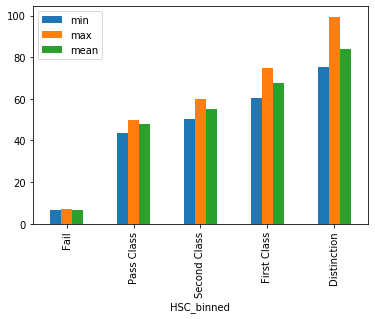

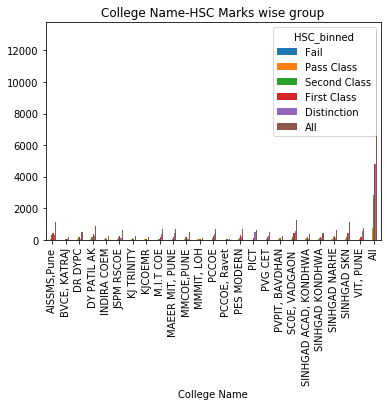

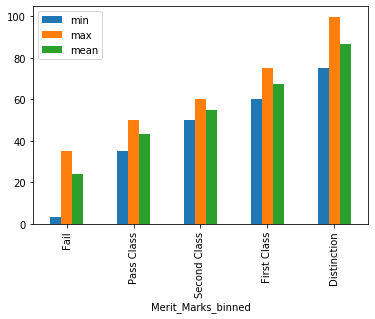

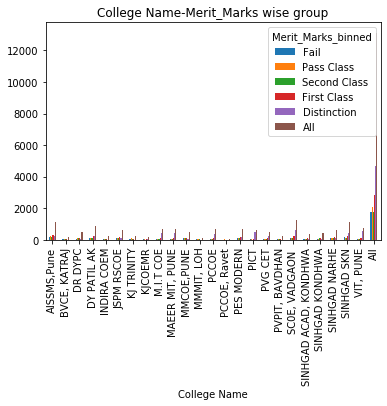

In [25]:
df['HSC Eligibility'] = df['HSC Eligibility'].astype(float)
get_HSC_binned(df)
get_Merit_Marks_binned(df)

# Excute only if want to excute EDA

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['College Name'] = np.where(pd.isnull(df['College Name']), 'SINHGAD SKN, VADGAON', df['College Name'])
df['College Name'] = label_encoder.fit_transform(df['College Name'])
college_names = label_encoder.classes_
df['temp_y'] = df['College Name']

In [77]:
def EDA_After_PP(df):
    df_college=df[['College Code', 'Category', 'HSC Eligibility', 'Merit Marks','BRANCH']]
    title="Heatmap for 2D representation of Features"
    plt.figure(figsize=(9,5))
    sns.heatmap(df_college.corr(),annot=True,linewidth = 0.9, cmap='coolwarm')
    #Collegewise Count group by Gender
    fig, ax = plt.subplots(figsize=(16,10))
    sns.countplot(x = "temp_y", hue="Gender" , data = df, ax=ax)
    
    #Collegewise Count group by Gender
    fig, ax = plt.subplots(figsize=(20,7))
    sns.countplot(x = "temp_y", hue="Category" , data = df, ax=ax)
    
    fig, ax = plt.subplots(figsize=(16,10))
    sns.countplot(x = "temp_y", hue="Home University" , data = df, ax=ax)
    
    fig, ax = plt.subplots(figsize=(16,10))
    sns.countplot(x = "temp_y", hue="Candidate Type" , data = df, ax=ax)
    
    # Boxplot
    plt.figure(figsize = (16,10))
    sns.boxplot( x = 'temp_y', y = 'Merit Marks', data = df)
    
    plt.figure(figsize = (16,10))
    sns.boxplot( x = 'temp_y', y = "HSC Eligibility", data = df)
    
    #Management Quota Admission 
    df.boxplot(column=['Merit Marks'],by=["College Code","BRANCH"],rot=45,figsize = (20,14))
    
     
    plt.figure(figsize = (16,10))
    sns.boxplot( x = 'BRANCH', y = 'Merit Marks', data = df)
    
    fig, ax = plt.subplots(figsize=(16,14))
    sns.countplot(x = "temp_y", hue="BRANCH" , data = df, ax=ax)

    return df

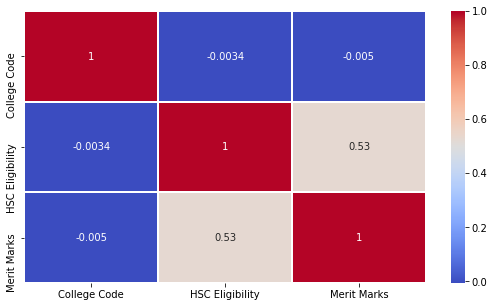

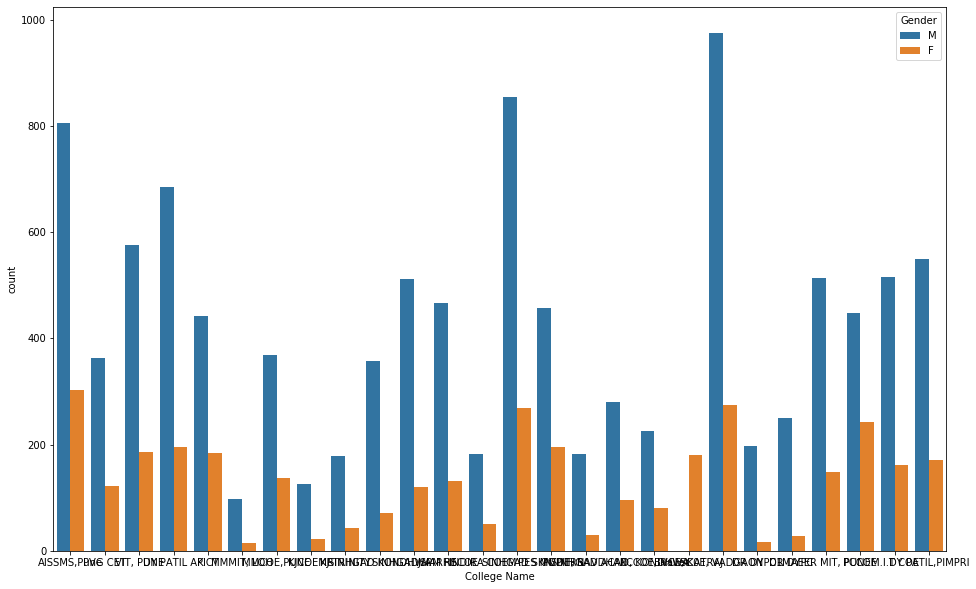

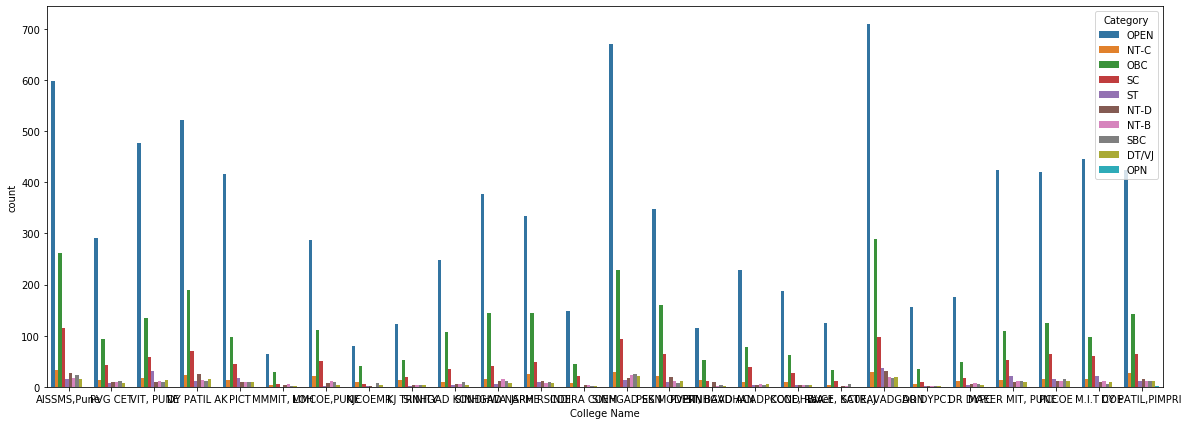

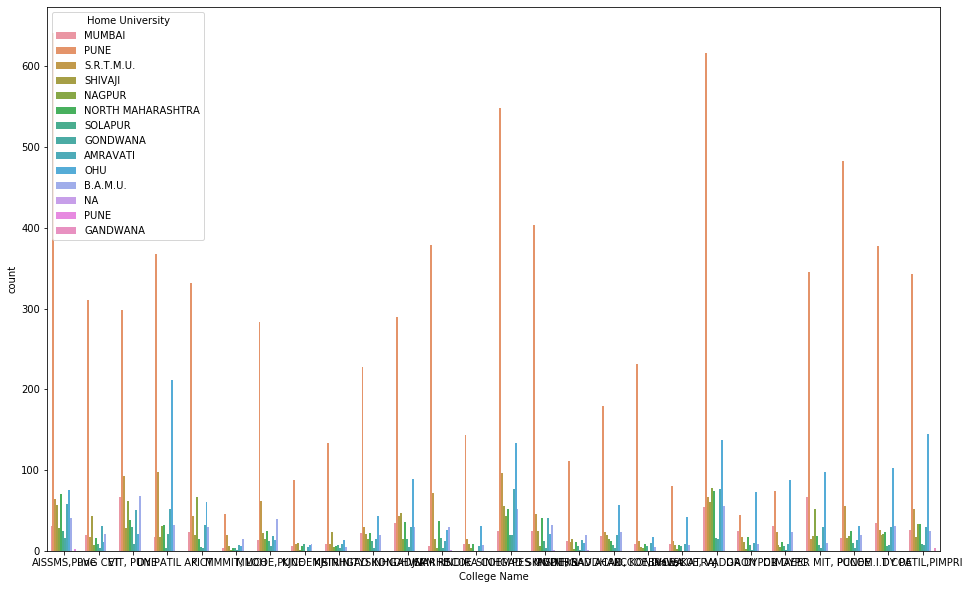

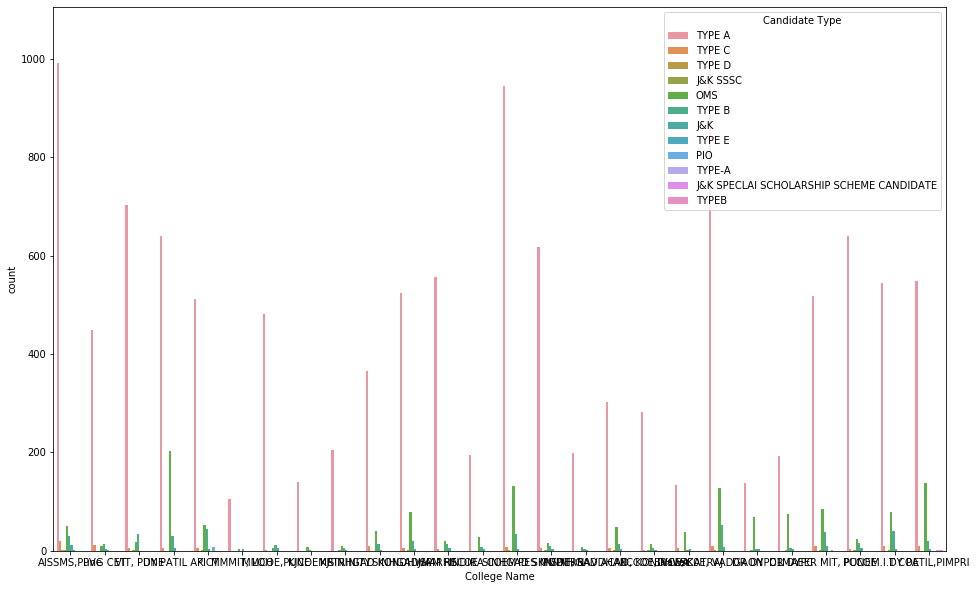

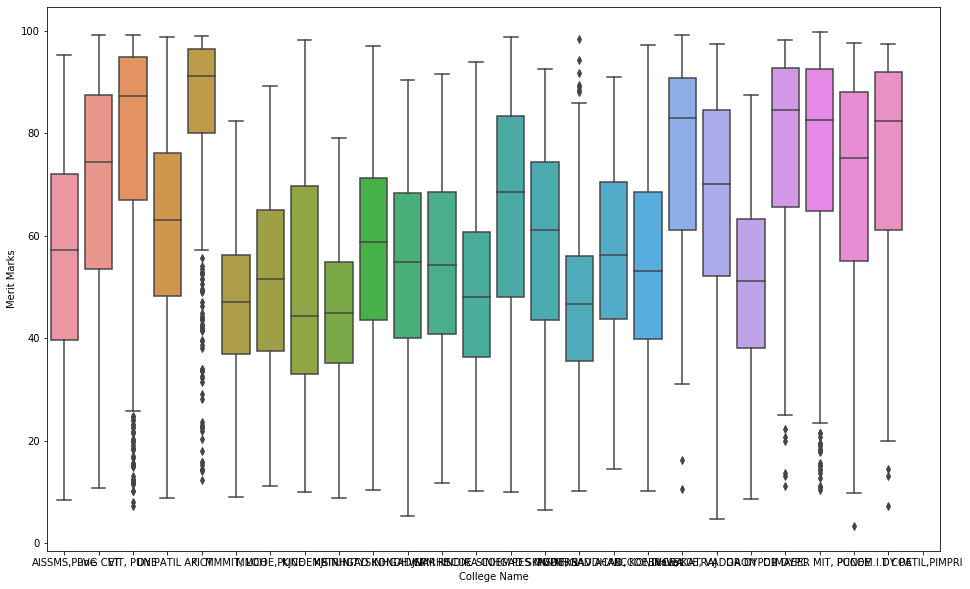

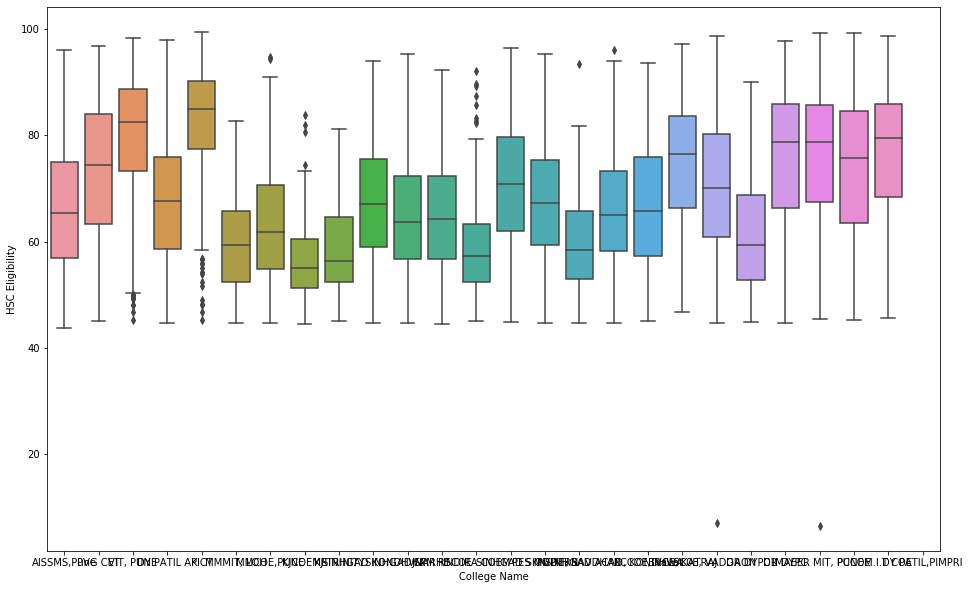

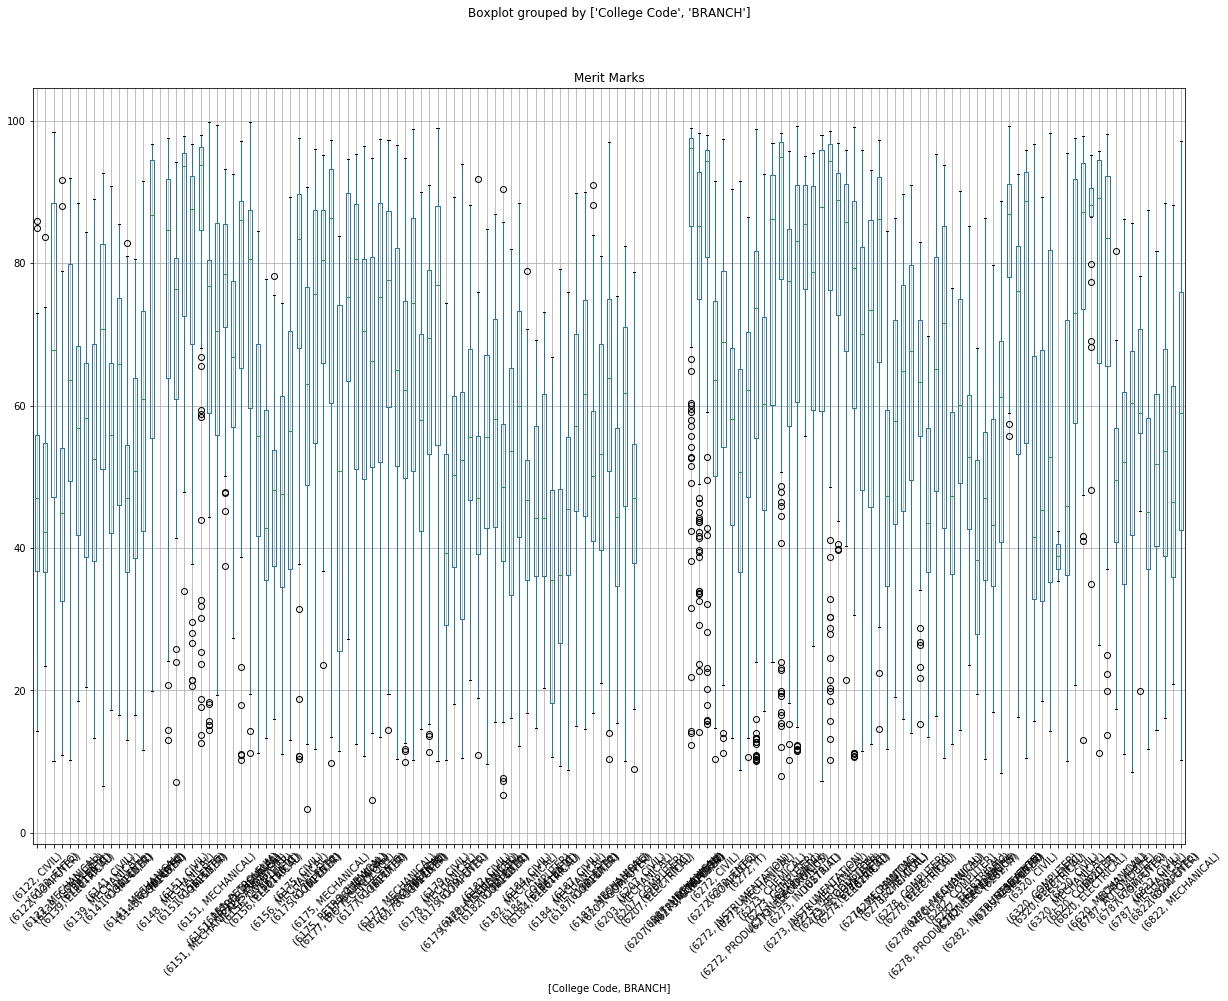

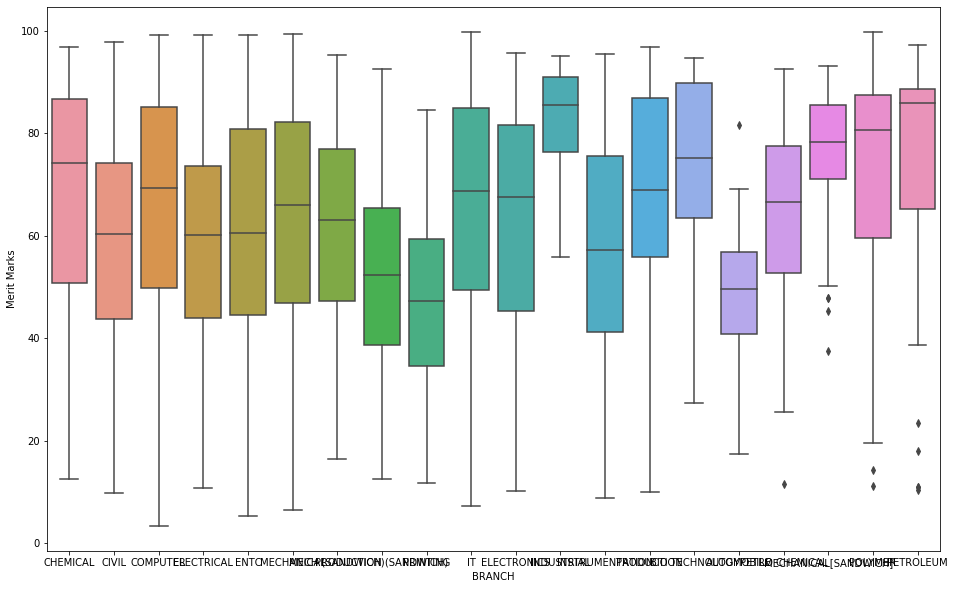

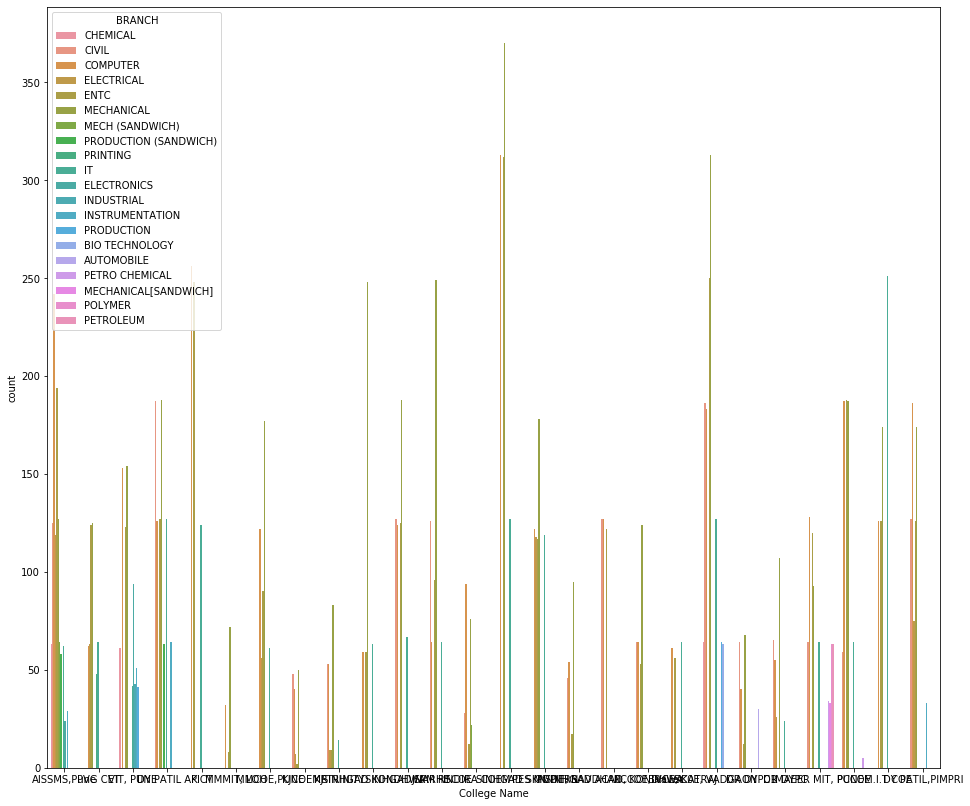

In [78]:
df = EDA_After_PP(df)

In [26]:
df['Category_PH Type'] = df['Category'].str.cat(df['PH Type'], sep =" ") 
df['Category_PH_Defence Type'] = df['Category_PH Type'].str.cat(df['Defence Type'], sep =" ") 
df.drop(['PH Type','Defence Type','Category_PH Type','Category'], axis=1, inplace=True)

df["Category_PH_Defence Type"].isnull().sum(), df["Category_PH_Defence Type"].unique()

(0,
 array(['OPEN NA NA', 'NT-C NA NA', 'OBC NA NA', 'SC NA NA', 'ST NA NA',
        'NT-D NA NA', 'OPEN NA DEF2', 'OPEN NA DEF3', 'NT-B NA NA',
        'SBC NA NA', 'OPEN NA DEF1', 'DT/VJ NA NA', 'OBC NA DEF1',
        'NT-D NA DEF1', 'NT-C PH3 NA', 'OBC NA DEF2', 'DT/VJ NA DEF1',
        'SC NA DEF1', 'OPEN PH3 NA', 'OPEN PH2 NA', 'OPEN PH1 NA',
        'SC PH3 NA', 'OBC PH1 NA', 'OBC PH2 NA', 'OBC PH3 NA',
        'ST NA DEF2', 'ST NA DEF1', 'NT-C NA DEF1', 'NT-B PH3 NA',
        'SC NA DEF2', 'NT-D NA DEF2', 'NT-B NA DEF1', 'NT-B NA DEF2',
        'NT-C NA DEF2', 'DT/VJ PH3 NA', '7397 NA NA', '13122 NA NA',
        '5725 NA NA'], dtype=object))

# Dont Execute if EDA is executed

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['College Name'] = np.where(pd.isnull(df['College Name']), 'SINHGAD SKN, VADGAON', df['College Name'])
df['College Name']= label_encoder.fit_transform(df['College Name'])
college_names = label_encoder.classes_
df['temp_y'] =df['College Name']

In [28]:
#Filling the null value

df['NATIONALITY'] = np.where(pd.isnull(df['NATIONALITY']), 'INDIAN', df['NATIONALITY'])
df['BRANCH'] = np.where(pd.isnull(df['BRANCH']), 'COMPUTER', df['BRANCH'])
df['Gender'] = np.where(pd.isnull(df['Gender']), 'M', df['Gender'])
df['Candidate Type'] = np.where(pd.isnull(df['Candidate Type']), 'TYPE A', df['Candidate Type'])
df['College Code'] = np.where(pd.isnull(df['College Code']), 6178, df['College Code'])
df['Merit No'] = np.where(pd.isnull(df['Merit No']), 6000, df['Merit No'])
df['Merit Marks'] = np.where(pd.isnull(df['Merit Marks']), 50, df['Merit Marks'])
df['HSC Eligibility'] = np.where(pd.isnull(df['HSC Eligibility']),50, df['HSC Eligibility'])

In [29]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
Home_University_label_encoder= LabelEncoder()
Gender_label_encoder=LabelEncoder()
Category_PH_Defence_Type_label_encoder=LabelEncoder()
Candidate_Type_label_encoder=LabelEncoder()
BRANCH_label_encoder=LabelEncoder()
NATIONALITY_label_encoder=LabelEncoder()
#Defence_Type_label_encoder=LabelEncoder()
CAP_Round_label_encoder=LabelEncoder()
#PH_Type_label_encoder=LabelEncoder()
# Encode labels in column 'in all'. 
df['Home University']= Home_University_label_encoder.fit_transform(df['Home University'])

df['Gender']= Gender_label_encoder.fit_transform(df['Gender'])

df['Category_PH_Defence Type']= Category_PH_Defence_Type_label_encoder.fit_transform(df['Category_PH_Defence Type'])

df['Candidate Type']= Candidate_Type_label_encoder.fit_transform(df['Candidate Type'])

df['BRANCH']=BRANCH_label_encoder.fit_transform(df['BRANCH'])

df['NATIONALITY']=NATIONALITY_label_encoder.fit_transform(df['NATIONALITY'])

#df['Defence Type']=Defence_Type_label_encoder.fit_transform(df['Defence Type'])

df['CAP Round']=CAP_Round_label_encoder.fit_transform(df['CAP Round'])

#df['PH Type']= PH_Type_label_encoder.fit_transform(df['PH Type'])
#df['HSC Eligibility']= label_encoder.fit_transform(df['HSC Eligibility'])

In [30]:
df.head(5)

,College Code,Merit No,Merit Marks,Gender,Candidate Type,Home University,HSC Eligibility,CAP Round,BRANCH,NATIONALITY,College Name,HSC_binned,Merit_Marks_binned,Category_PH_Defence Type,temp_y
0,6278.0,18840.0,23.9385,1,4,3,80.00,5,2,0,0,Distinction,Fail,26,0
1,6278.0,54528.0,53.3348,1,4,8,70.83,5,2,0,0,First Class,Second Class,12,0
2,6278.0,33711.0,67.6209,1,4,8,61.67,5,2,0,0,First Class,First Class,19,0
3,6278.0,42315.0,61.3212,1,4,8,68.33,5,2,0,0,First Class,First Class,19,0
4,6278.0,21755.0,78.0387,1,4,8,58.00,5,2,0,0,Second Class,Distinction,26,0


In [31]:
df.drop(['College Name'], axis=1, inplace=True)
df.drop(['College Code'], axis=1, inplace=True)
df.drop(['HSC_binned'], axis=1, inplace=True)
df.drop(['Merit_Marks_binned'], axis=1, inplace=True)
df.shape
    

(13122, 11)

In [32]:
df_col_idx = [df.columns.get_loc(c) for c in df.columns.values if c in df]
df_col_name = list(df.columns.values)
print (df_col_name)
print (df_col_idx)

['Merit No', 'Merit Marks', 'Gender', 'Candidate Type', 'Home University', 'HSC Eligibility', 'CAP Round', 'BRANCH', 'NATIONALITY', 'Category_PH_Defence Type', 'temp_y']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [33]:
X=df.iloc[:,:len(df_col_idx)-1]    # predictors
y = df['temp_y']     # target variable
print("X:",X.shape)
print("y:",y.shape)

X: (13122, 10)
y: (13122,)


In [34]:
# Split dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2019)
df.head()

,Merit No,Merit Marks,Gender,Candidate Type,Home University,HSC Eligibility,CAP Round,BRANCH,NATIONALITY,Category_PH_Defence Type,temp_y
0,18840.0,23.9385,1,4,3,80.00,5,2,0,26,0
1,54528.0,53.3348,1,4,8,70.83,5,2,0,12,0
2,33711.0,67.6209,1,4,8,61.67,5,2,0,19,0
3,42315.0,61.3212,1,4,8,68.33,5,2,0,19,0
4,21755.0,78.0387,1,4,8,58.00,5,2,0,26,0


In [35]:
#import StandardScale` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
#X_train = StandardScaler().fit_transform(X_train)
X_test = standard_scaler.transform(X_test)
#X_test = StandardScaler().fit_transform(X_test)

# Neural Network Model


In [57]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

25


In [ ]:
model = Sequential()
model.add(Dense(600, activation='tanh', input_shape=(13,)))
model.add(Dense(200, activation='tanh'))
model.add(Dense(60, activation='tanh'))
model.add(Dense(20, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# build the model
model.fit(X_train, y_train, epochs=500)

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

# Model Accuracy Comparision using Cross Validation & Boxplot 

LR: 0.147519 (0.010694)
SVM: 0.211320 (0.012068)
DTreeC: 0.311707 (0.020007)
RF: 0.362223 (0.010796)
NB: 0.092217 (0.009377)
KNN: 0.201960 (0.011767)


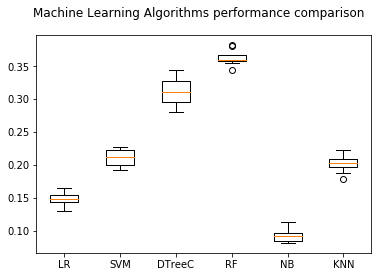

In [36]:
from sklearn.model_selection import KFold
models_list = []

models_list.append(('LR', LogisticRegression(max_iter=1000)))
models_list.append(('SVM', SVC()))
models_list.append(('DTreeC', DecisionTreeClassifier()))
models_list.append(('RF', RandomForestClassifier(n_estimators=300, max_features=3)))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

results = []
algo_names = []

for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=2019)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cross_val_results)
    algo_names.append(name)
    info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(info)

fig = plt.figure()
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algo_names)
plt.show()



In [83]:
#Logistic

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

y_train_pred=logmodel.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=logmodel.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print("\n\nClassification Report:\n",report)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print("\nConfusion Matrix:\n",cm)

accuracy=accuracy_score(y_test,predictions)
print("\nAccuracy:",accuracy)

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,predictions,margins=True,rownames=['Actual'],colnames=['Prediction']))



Train Results...     Accuracy :  0.7005988023952096

Test Results...      Accuracy :  0.6903733807467615


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       346
           1       0.52      0.39      0.45        61
           2       0.74      0.65      0.69       144
           3       0.82      0.26      0.39        35
           4       0.71      0.83      0.76       208
           5       1.00      0.20      0.33        20
           6       0.76      0.80      0.78       201
           7       0.73      0.82      0.77       180
           8       0.65      0.11      0.20       148
           9       0.61      0.38      0.47        60
          10       0.58      0.86      0.69       369
          11       0.26      0.17      0.21       117
          12       0.46      0.40      0.43       149
          13       0.48      0.18      0.26       138
          14       0.39      0.21      0.27       176
  

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
# linear SVM classifier

#It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary 

from sklearn.svm import SVC 

svm_model_linear = SVC(kernel = 'linear', C = 1)
svm_model_linear.fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

y_train_pred=svm_model_linear.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=svm_model_linear.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Train Results...     Accuracy :  0.15699510070767556

Test Results...      Accuracy :  0.15544831089662178


confusion marix :
[[163   5   6  10   0   0   0   0   2   0   0   0   0   0   0   2   0   0
  119   0   0   0  34   0   5]
 [ 27  11   0   7   0   0   0   0   0   0   0   0   0   0   0   2   0   0
   10   0   0   0   4   0   0]
 [ 77   0  16  21   0   0   0   2   1   1   0   0   0   0   0   0   0   0
   17   0   0   0  12   0   2]
 [ 91   1  12  39   0   0   0   0   0   6   0   0   1   0   0   1   0   0
   79   0   0   0  22   0   1]
 [ 46   0   4   6   0   0   0   0   0   1   0   0   0   0   0   0   0   0
   10   0   0   0   1   0   0]
 [ 91   2   1   3   0   0   0   0   0   0   0   0   0   0   0   1   0   0
   52   0   0   0  26   0   1]
 [ 45   0   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    7   0   0   0   9   0   1]
 [ 45   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    3   0   0   0   3   0   0]
 [ 14   0   1  16   0   0   0  

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
# Decision Tree Classifier

#The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features

clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=2019)
clf.fit(X_train,y_train)

print('\n\nFeature Importances :', clf.feature_importances_)

y_train_pred=clf.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=clf.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))


print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.32738626 0.2029074  0.00398035 0.02545532 0.00233539 0.00342734
 0.02141697 0.39989989 0.         0.01319108]


Train Results...     Accuracy :  0.23298856831790962

Test Results...      Accuracy :  0.2189484378968758


confusion marix :
[[ 98   0  12  62   0   7   0   0   0   0   0   0   0   0   5   1   0   0
   11   0   0   1 142   0   7]
 [ 11   0   0   9   0   0   0   0   0   0   0   0   0   0   4   0   0   0
    1   0   0   0  34   0   2]
 [ 21   0  28  29   0  28   0   1   0   0   0   0   0   0   5   0   0   0
    6   1   0   0  22   0   8]
 [ 30   0   8  98   0  12   0   0   0   2   0   0   0   0   1   3   0   0
   12   0   0   0  84   0   3]
 [ 15   0   4   4   1  18   0   0   0   0   0   0   0   0   3   0   0   0
    3   1   0   5   7   0   7]
 [  6   0   9  57   0  33   0   0   0   0   0   0   0   0   2   0   0   0
    5   0   0   3  59   0   3]
 [ 16   0   8   4   1  18   0   0   0   0   0   0   0   0   3   0   0   0
    4   1   0   1   8   0   3]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
# Random Forest

#Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
# Random Forest

#Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

num_trees = 10
n_jobs = -1 

rd = RandomForestClassifier(n_estimators=num_trees,max_leaf_nodes=65,n_jobs=n_jobs,random_state=2019)
rd.fit(X_train, y_train)
y_pred=rd.predict(X_test)
print('\n\nFeature Importances :', rd.feature_importances_)

y_train_pred=rd.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=rd.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.23935811 0.22802417 0.01622283 0.02791761 0.02485297 0.08558971
 0.06536731 0.28484361 0.00101613 0.02680755]


Train Results...     Accuracy :  0.3249863908546543

Test Results...      Accuracy :  0.2664465328930658


confusion marix :
[[172   0   7  23   0   4   0   0   0   0   6   0   2   0   7   2   0   0
   39   1   0   2  77   0   4]
 [ 30   0   0   2   0   0   0   0   1   0   1   0   0   0   3   3   0   0
   16   0   0   0   5   0   0]
 [ 32   0  53   8   0   5   0   3   1   0   3   0   0   0   0   1   0   4
   20   0   0   6   7   0   6]
 [ 76   0  10  46   0   8   0   0   1   3   3   0   0   0  11   1   0   1
   24   1   1   2  62   0   3]
 [ 29   0  15   2   0   2   0   0   0   0   2   0   0   0   0   0   0   4
   11   0   0   2   0   0   1]
 [ 61   0   5   3   0  35   0   0   1   0  11   0   3   0   7   1   0   0
    9   2   5   1  33   0   0]
 [ 31   0  12   1   0   8   0   0   0   0   3   0   0   0   0   0   0   3
    4   0   0   3   1   0   1]
 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
# Naive Bayes

#It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class. 
#It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

num_folds=10

kfold=StratifiedKFold(n_splits=num_folds,random_state=2019)

gnb_clf=GaussianNB()
gnb_clf.fit(X_train,y_train)
results=cross_val_score(gnb_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=gnb_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=gnb_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))

CV-Accuracy: 0.09101882077943013
Train------ Accuracy: 0.09286880783886772
Test------ Accuracy: 0.09017018034036069


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [1]:
# KNN

#Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB

k=7

knn_clf=KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train,y_train)

results=cross_val_score(knn_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=knn_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=knn_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))


NameError: name 'X_train' is not defined

In [25]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

num_trees=100
num_folds=5

kfold=StratifiedKFold(n_splits=10,random_state=41)

xgb_clf=XGBClassifier(n_estimators=175,seed=41)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test,y_test)],verbose=1)
results=cross_val_score(xgb_clf,X_train,y_train,cv=kfold)
print("\n XGBoost--CV.Train :%.2f" % results.mean())
y_train_pred=xgb_clf.predict(X_train)

y_train_pred_proba = xgb_clf.predict_proba(X_train)
y_test_pred_proba = xgb_clf.predict_proba(X_test)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

def getbestThree(y_prob):
    colleges = pd.DataFrame(columns = ["F_Preference","S_Preference", "T_Preference"], index = range(0,len(y_prob)))
    
    for i in range(0, len(y_prob)):
        top_3_idx = np.argsort(y_prob[i])[-3:]
        colleges.iloc[i][0] = college_names[top_3_idx[2]]
        colleges.iloc[i][1] = college_names[top_3_idx[1]]
        colleges.iloc[i][2] = college_names[top_3_idx[0]]
                 
    return colleges

def predict(original, suggested, predicted):
    for i in range(0, len(original)):
        if(college_names[original.iloc[i]] in suggested.iloc[i,:].values):
            predicted[i] = original.iloc[i]
        else:
            predicted[i] = predicted[i]
        
    return predicted

y_train_suggested = getbestThree(y_train_pred_proba)
y_test_suggested = getbestThree(y_test_pred_proba)

y_train_pred = predict(y_train, y_train_suggested, y_train_pred)
y_test_pred = predict(y_test, y_test_suggested, y_test_pred)

print('Train Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))
print('Test Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))

[0]	validation_0-merror:0.72415
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.70764
[2]	validation_0-merror:0.69901
[3]	validation_0-merror:0.68961
[4]	validation_0-merror:0.68402
[5]	validation_0-merror:0.68478
[6]	validation_0-merror:0.67971
[7]	validation_0-merror:0.67539
[8]	validation_0-merror:0.67005
[9]	validation_0-merror:0.66853
[10]	validation_0-merror:0.66472
[11]	validation_0-merror:0.66243
[12]	validation_0-merror:0.66091
[13]	validation_0-merror:0.65862
[14]	validation_0-merror:0.65735
[15]	validation_0-merror:0.65431
[16]	validation_0-merror:0.65583
[17]	validation_0-merror:0.65583
[18]	validation_0-merror:0.65634
[19]	validation_0-merror:0.65710
[20]	validation_0-merror:0.65456
[21]	validation_0-merror:0.65456
[22]	validation_0-merror:0.65405
[23]	validation_0-merror:0.64923
[24]	validation_0-merror:0.64795
[25]	validation_0-merror:0.64923
[26]	validation_0-merror:0.65100
[27]	validation_0-merror:0.64821
[28]	validation_0-m

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)



 XGBoost--CV.Train :0.36
Train Results...     Accuracy :  0.9699510070767556
Test Results...      Accuracy :  0.6596393192786385
Prediction    0   1    2    3   4    5   6   7    8    9  ...  16  17   18  \
Actual                                                    ...                
0           254   2    8   11   0    6   0   0    0    1  ...   6   0    8   
1             5  35    0    3   0    2   0   1    0    0  ...   1   0    1   
2             4   0   90    1   2    6   2   7    2    1  ...   0   8    4   
3            12   5    3  167   1    5   2   0    0    0  ...   2   1    7   
4             1   0    6    4  27    1   5   2    0    0  ...   0   5    0   
5            12   0    3   15   1   91   1   0    1    1  ...   1   1    2   
6             4   1   10    0   8    3  23   1    0    0  ...   0   2    2   
7             1   0    8    2   0    2   2  28    0    0  ...   0   4    0   
8             0   1    1    1   1    1   0   0  155    5  ...   1   0   14   
9           

In [26]:
y_train_suggested

,F_Preference,S_Preference,T_Preference
0,"MMCOE,PUNE","AISSMS,Pune",KJ TRINITY
1,DY PATIL AK,SINHGAD SKN,PES MODERN
2,PCCOE,SINHGAD KONDHWA,JSPM RSCOE
3,SINHGAD SKN,"SC0E, VADGAON",DY PATIL AK
4,"MMCOE,PUNE",JSPM RSCOE,SINHGAD KONDHWA
...,...,...,...
9180,KJ TRINITY,"AISSMS,Pune",SINHGAD NARHE
9181,PCCOE,"AISSMS,Pune",SINHGAD KONDHWA
9182,"MAEER MIT, PUNE","VIT, PUNE",M.I.T COE
9183,DR DYPC,"PVPIT, BAVDHAN",KJ TRINITY


In [ ]:
#''Merit No', 'Merit Marks', 'Gender', 'Candidate Type', 'Home University', 'HSC Eligibility', 'CAP Round', 'BRANCH', 'NATIONALITY', 'Category_PH_Defence Type'

In [27]:
test_record=[137,  63.63,'M','TYPE A','B.A.M.U.',70.17,'ROUND-1','ENTC','INDIAN','NT-D NA NA',]

test_record[2]=Gender_label_encoder.transform([test_record[2]])[0]
test_record[3]=Candidate_Type_label_encoder.transform([test_record[3]])[0]
test_record[4]=Home_University_label_encoder.transform([test_record[4]])[0]
test_record[6]=CAP_Round_label_encoder.transform([test_record[6]])[0]
test_record[7]=BRANCH_label_encoder.transform([test_record[7]])[0]
test_record[8]=NATIONALITY_label_encoder.transform([test_record[8]])[0]
test_record[9]=Category_PH_Defence_Type_label_encoder.transform([test_record[9]])[0]
test_record

[137, 63.63, 1, 4, 1, 70.17, 5, 7, 0, 16]

In [28]:
standarize_new_record=standard_scaler.transform([test_record])
standarize_new_record

array([[-0.97069591,  0.03490343,  0.5711062 ,  0.22795923, -2.1705847 ,
         0.02660318,  0.01366027, -0.19865399, -0.08108849, -1.40599942]])

In [29]:
newrecord_pred_proba = xgb_clf.predict_proba(standarize_new_record)

In [30]:
getbestThree(newrecord_pred_proba)

,F_Preference,S_Preference,T_Preference
0,"SC0E, VADGAON",PCCOE,PICT


In [40]:
rslt_df = df1[df1['CAP Round'] =="INSTITUTE LEVEL"]
rslt_df
import pandas as pd 
  
# making data frame from csv file 
df1 = pd.read_csv("STUDENT_DATA13.csv", index_col ="CAP Round" ) 
  
# dropping passed values 
df1.drop(["INSTITUTE LEVEL"], inplace = True) 
  
# display 
df1.shape 

(10345, 19)